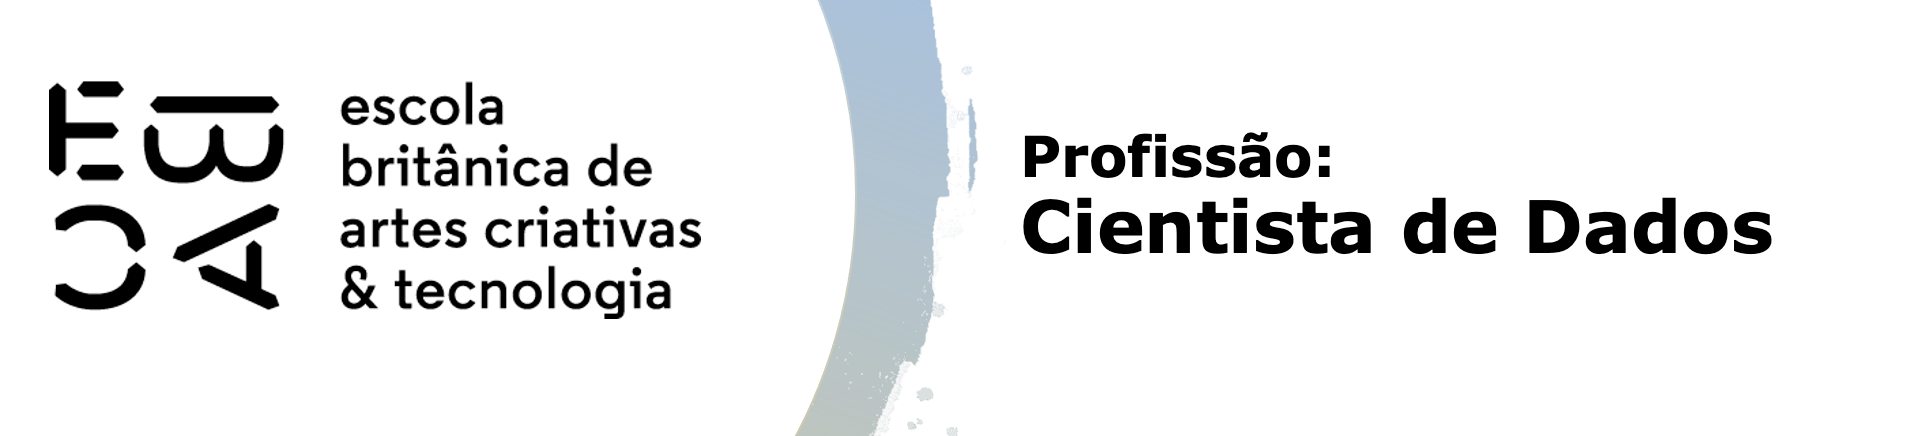

# Inferência

In [26]:
import pandas               as pd
import seaborn              as sns
import scipy.stats          as stats
import numpy                as np
import matplotlib.pyplot    as plt
from   scipy                import stats

In [27]:
penguins_df = sns.load_dataset('penguins')

In [28]:
penguins_df.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

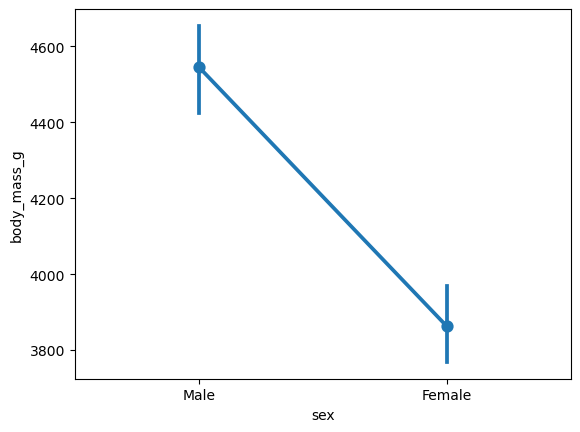

In [29]:
sns.pointplot(data=penguins_df, x='sex', y='body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [30]:
# Remover linhas com valores faltantes na coluna 'body_mass_g'
penguins_df.dropna(subset=['body_mass_g'], inplace=True)

In [31]:
# Separar os pesos dos machos e fêmeas
pesos_machos = penguins_df[penguins_df['sex'] == 'Male']['body_mass_g']
pesos_femeas = penguins_df[penguins_df['sex'] == 'Female']['body_mass_g']

# Verificar se há variação nos dados
if pesos_machos.var() == 0 or pesos_femeas.var() == 0:
    print("Não é possível realizar o teste T porque não há variação nos dados de pelo menos um dos grupos.")
else:
    # Desvio padrão
    desvio_padrao_machos = pesos_machos.std()
    desvio_padrao_femeas = pesos_femeas.std()
    
    # Erro padrão
    erro_padrao_machos = desvio_padrao_machos / (len(pesos_machos) ** 0.5)
    erro_padrao_femeas = desvio_padrao_femeas / (len(pesos_femeas) ** 0.5)
    
    # Teste T para diferença de médias
    teste_t, p_valor = stats.ttest_ind(pesos_machos, pesos_femeas, equal_var=False)

    # Região crítica para 5% de significância (bicaudal)
    graus_de_liberdade = len(pesos_machos) + len(pesos_femeas) - 2
    regiao_critica = stats.t.ppf(1 - 0.025, graus_de_liberdade)

    # Exibir o resultado do teste
    print("Resultado do teste T:")
    print("Estatística do teste T:", teste_t)
    print("Valor de p:", p_valor)
    print("Desvio padrão dos machos:", desvio_padrao_machos)
    print("Desvio padrão das fêmeas:", desvio_padrao_femeas)
    print("Erro padrão dos machos:", erro_padrao_machos)
    print("Erro padrão das fêmeas:", erro_padrao_femeas)
    print("Região crítica (bicaudal) para 5% de significância:", regiao_critica)

    # Verificar se a diferença é estatisticamente significativa com 5% de significância
    significativo = p_valor < 0.05
    if significativo:
        print("Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas de pinguins.")
    else:
        print("Conclusão: Não há evidências estatísticas de que há diferença de peso entre machos e fêmeas de pinguins.")

Resultado do teste T:
Estatística do teste T: 8.554537231165762
Valor de p: 4.793891255051457e-16
Desvio padrão dos machos: 787.6288841581745
Desvio padrão das fêmeas: 666.1720495161447
Erro padrão dos machos: 60.76688767625537
Erro padrão das fêmeas: 51.86142371782365
Região crítica (bicaudal) para 5% de significância: 1.9671567996106814
Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas de pinguins.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

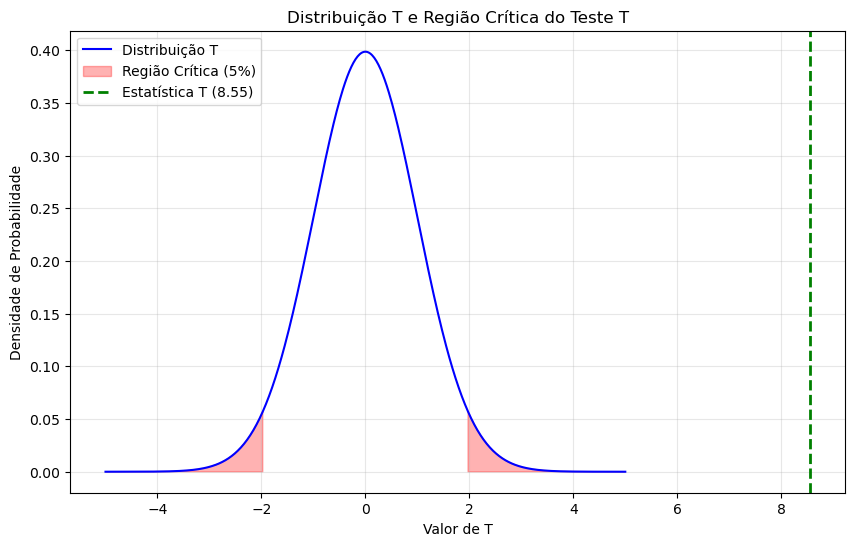

In [32]:
# Criar o espaço para a curva T
x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, graus_de_liberdade)

# Plotar a curva da distribuição T
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição T', color='blue')

# Região crítica (marcar as áreas extremas)
plt.fill_between(x, 0, y, where=(x < -regiao_critica) | (x > regiao_critica), color='red', alpha=0.3, label='Região Crítica (5%)')

# Estatística do teste T
plt.axvline(teste_t, color='green', linestyle='--', linewidth=2, label=f'Estatística T ({teste_t:.2f})')

# Informações adicionais no gráfico
plt.title('Distribuição T e Região Crítica do Teste T')
plt.xlabel('Valor de T')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(alpha=0.3)

# Exibir o gráfico
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [33]:
# Realizar o teste T para cada espécie de pinguim
for especie in penguins_df['species'].unique():
    print(f"Espécie: {especie}")
    pesos_machos = penguins_df[(penguins_df['sex'] == 'Male') & (penguins_df['species'] == especie)]['body_mass_g']
    pesos_femeas = penguins_df[(penguins_df['sex'] == 'Female') & (penguins_df['species'] == especie)]['body_mass_g']
    
    # Realizar o teste T para diferença de médias
    teste_t, p_valor = stats.ttest_ind(pesos_machos, pesos_femeas, equal_var=False)

    # Exibir o valor p associado a cada espécie
    print("Valor de p:", p_valor)
    if p_valor < 0.05:
        print("Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas.")
    else:
        print("Conclusão: Não há evidências estatísticas de que há diferença de peso entre machos e fêmeas.")
    print()

Espécie: Adelie
Valor de p: 6.402319748031793e-26
Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas.

Espécie: Chinstrap
Valor de p: 2.26443155146514e-06
Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas.

Espécie: Gentoo
Valor de p: 1.8677596749117468e-28
Conclusão: Há evidências estatísticas de que há diferença de peso entre machos e fêmeas.

